# Part I : Ford GoBike System Data Explorartion
## by Olumide Johnson Amune

## Introduction

>This data set is an information on customer and Subscribers rides made in Ford Gobike-sharing system covering the greater San Francisco Bay area updated to february 2019.

>No dataset ever comes completely clean and this isn't an exception and would require a bit of data wrangling in order to make it tidy for the analysis we intend to carry out on it.

> Finally this dataset is hosted on the Udacity Site(https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv). and this is a lirect link to the download


#### *We intend to perform the follwing in  this data set

- [Preliminary Wrangling](#wrangle)
- [Univariate Explorations](#univariate)
- [Bivariate Explorations](#bivariate)
- [Multivariate Explorations](#multivariate)
- [Conclusion](#conclusion)



## Preliminary Wrangling


In [306]:
# First we import all packages and set plots to be embedded inline:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [307]:
# now we want to load in the dataset using pandas dataframe.
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [308]:
# Dataframe shape
bike_df.shape

(183412, 16)

In [309]:
# Data type
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [310]:
# top 10 row in the dataframe
bike_df.head()
# bike_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [311]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [312]:
# checking for null values
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [313]:
# check for duplicated values
bike_df.duplicated().sum()

0

In [314]:
#Information about data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

 #### dataset structure:
 This dataset contains records of 183,411 trips, recorded between February and early March, details of its 16 columns contains info of the day, time of the day, what type of a user took the ride, when, where did they start and end the trip etc.


#### Insight into Data Set
There are 16 variables (columns) and 183,411 rows in this dataset.
the following was observed:
* `start_time` and `end_time` are the wrong data type - this should be datetime rather than object
* `start_station_id` and `end_station_id` should not be floats - these can be amended to integers, however these represent locations (meaning that no numerical operations will be applied to these) they can be converted to objects.
* `member_birth_year` should be a integer
* `member_gender`, `bike_share_for_all_trip` and `user_type` should be category
* Null values occurnece in the following columns:
    - `start_station_id` and `start_station_name`
    - `end_station_id` and `end_station_name`
    - `member_birth_year` and `member_gender`
* Drop the Following columns which aren't relevant to our analysis:
    - `start_station_latitude` and `start_station_longitude`
    - `end_station_latitude` and `end_station_longitude`

#### Lets Start Cleaning!!

#### Drop null values, change data types and drop unnecessary columns
code:

In [315]:
# First lets drop null values
clean_df = bike_df.dropna()

In [316]:
# Change member birth year type from float to int
clean_df.member_birth_year = clean_df.member_birth_year.astype(int)

In [317]:
# some columns are unnecessary for this analys so it will drop them
clean_df.drop(columns=['start_station_id', 'start_station_name',
                      'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

In [318]:
# lets Change the start_time, end_time to datetime data type
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['end_time'] = pd.to_datetime(clean_df['end_time'])

In [319]:
# lets see if it worked!
clean_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

 #### Convert Longitude and Latitude to Distance

In [320]:
# now lets Calculate Distance from the given latitude & longitude data
# then we make a new column called 'distance'
#source :(https://www.movable-type.co.uk/scripts/latlong.html)

dLat = np.deg2rad(clean_df['end_station_latitude'] - clean_df['start_station_latitude'])
dLon = np.deg2rad(clean_df['end_station_longitude'] - clean_df['start_station_longitude'])

lat2 = np.deg2rad(clean_df['end_station_latitude'])
lat1 = np.deg2rad(clean_df['start_station_latitude'])

a = np.square(np.sin(dLat/2)) + np.cos(lat1)*np.cos(lat2)*np.square(np.sin(dLon/2))

clean_df['distance'] = 6371e3*2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

In [321]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No,544.708503
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No,2704.545131
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No,260.738544
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes,2409.301416
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No,3332.202628


In [322]:
# next up... we want to get rid of dem no longer relevant columns
clean_df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
              'end_station_longitude'], axis=1, inplace=True)

In [323]:
# lets see if it worked!
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   user_type                174952 non-null  object        
 4   member_birth_year        174952 non-null  int32         
 5   member_gender            174952 non-null  object        
 6   bike_share_for_all_trip  174952 non-null  object        
 7   distance                 174952 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(3)
memory usage: 11.3+ MB


> Lets convert Time in seconds to minutes && Birth Year to Actual Age

In [324]:
# lets convert birth date to age as at 2019
clean_df['Age']= (2019 - clean_df['member_birth_year'])
# lets convert duration to minutes from seconds
clean_df['duration_minutes']= (clean_df['duration_sec']/60)
clean_df['distance']= (clean_df['distance']/1000)

In [325]:
# lets also convert data types for the following columns as category type

In [326]:
clean_df['member_gender'] = clean_df['member_gender'].astype('category')
clean_df['bike_share_for_all_trip']= clean_df['bike_share_for_all_trip'].astype('category')
clean_df['user_type']= clean_df['user_type'].astype('category')

In [327]:
# Quick Check!!
clean_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
distance                          float64
Age                                 int32
duration_minutes                  float64
dtype: object

 #### Let's extract day and month information form start_time into new columns day and month

In [328]:
#Code:
clean_df['start_day'] = clean_df.start_time.dt.day_name()
clean_df['end_day'] = clean_df.end_time.dt.day_name()
clean_df['month'] = clean_df.start_time.dt.month_name()
clean_df['end_month'] = clean_df.end_time.dt.month_name()

In [329]:
#Code
clean_df['start_hour'] = clean_df.start_time.dt.hour
clean_df['end_hour'] = clean_df.end_time.dt.hour

In [330]:
#lets group hour into time of the Day
def getTimeOfDay(time):
    hour = time.hour
    if hour >= 12 and hour <= 16:
        return 'Afternoon'
    if hour > 16 and hour <= 19:
        return 'Evening'
    if hour >= 0 and hour < 6: 
        return 'Night'
    if hour > 19 and hour <= 23:
        return 'Night'
    if hour >= 6 and hour < 12:
        return 'Morning'

In [331]:
# create a column for day time i.e evening/afternoon/evening/night
clean_df['day_time'] = clean_df['start_time'].apply(lambda time: getTimeOfDay(time))
clean_df['trip_end_time'] = clean_df['end_time'].apply(lambda time: getTimeOfDay(time))

In [332]:
clean_df.sample(5)

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,Age,duration_minutes,start_day,end_day,month,end_month,start_hour,end_hour,day_time,trip_end_time
153125,621,2019-02-06 13:29:17.961,2019-02-06 13:39:39.822,Customer,1983,Female,No,1.413393,36,10.350000,Wednesday,Wednesday,February,February,13,13,Afternoon,Afternoon
100528,764,2019-02-14 18:11:36.774,2019-02-14 18:24:21.214,Subscriber,1993,Male,No,1.910193,26,12.733333,Thursday,Thursday,February,February,18,18,Evening,Evening
12974,1855,2019-02-27 16:40:47.275,2019-02-27 17:11:42.455,Subscriber,1996,Male,No,6.880416,23,30.916667,Wednesday,Wednesday,February,February,16,17,Afternoon,Evening
143339,577,2019-02-07 15:42:41.927,2019-02-07 15:52:19.402,Customer,1990,Female,No,2.366346,29,9.616667,Thursday,Thursday,February,February,15,15,Afternoon,Afternoon
146129,462,2019-02-07 08:58:50.630,2019-02-07 09:06:32.694,Subscriber,1972,Male,No,0.851870,47,7.700000,Thursday,Thursday,February,February,8,9,Morning,Morning


###### ReArrange Columns and Drop Unuseful columns

In [333]:
#lets Re-Order the columns to our taste
clean_df = clean_df[['user_type', 'member_gender', 'Age','start_day', 'day_time', 'distance', 'duration_minutes', 
                     'month', 'bike_share_for_all_trip', 'end_month', 'start_hour', 'end_hour', 'trip_end_time',
                     'duration_sec', 'start_time', 'end_time', 'member_birth_year', 'end_day',]]

In [334]:
# Check :
clean_df.sample(5)

,user_type,member_gender,Age,start_day,day_time,distance,duration_minutes,month,bike_share_for_all_trip,end_month,start_hour,end_hour,trip_end_time,duration_sec,start_time,end_time,member_birth_year,end_day
104788,Subscriber,Female,29,Thursday,Morning,1.611609,10.100000,February,No,February,8,8,Morning,606,2019-02-14 08:04:40.999,2019-02-14 08:14:47.030,1990,Thursday
151466,Subscriber,Male,31,Wednesday,Evening,0.417765,1.283333,February,No,February,17,17,Evening,77,2019-02-06 17:21:12.622,2019-02-06 17:22:29.685,1988,Wednesday
67772,Subscriber,Male,48,Wednesday,Morning,0.857372,4.416667,February,No,February,7,7,Morning,265,2019-02-20 07:34:04.405,2019-02-20 07:38:30.187,1971,Wednesday
176582,Subscriber,Male,43,Saturday,Morning,0.437951,5.100000,February,No,February,11,11,Morning,306,2019-02-02 11:04:15.379,2019-02-02 11:09:21.481,1976,Saturday
140064,Customer,Female,30,Thursday,Evening,1.623196,10.033333,February,No,February,19,19,Evening,602,2019-02-07 19:39:10.043,2019-02-07 19:49:13.014,1989,Thursday


In [335]:
#lets further drop some more columns we don't probably need 
clean_df.drop(['end_month', 'end_hour', 'trip_end_time', 'end_month', 'duration_sec', 
               'start_time', 'end_time', 'member_birth_year', 'end_day'], axis=1, inplace=True)

In [336]:
# Check:
clean_df.sample(5)

,user_type,member_gender,Age,start_day,day_time,distance,duration_minutes,month,bike_share_for_all_trip,start_hour
180828,Subscriber,Male,26,Friday,Morning,1.197415,7.300000,February,No,10
179034,Subscriber,Male,36,Friday,Afternoon,0.963968,7.050000,February,No,15
147987,Subscriber,Female,39,Thursday,Morning,1.847785,8.600000,February,No,6
159334,Subscriber,Female,33,Tuesday,Evening,2.007867,10.883333,February,No,18
23410,Subscriber,Other,43,Monday,Night,1.893651,8.350000,February,No,20


In [337]:
clean_df.dtypes

user_type                  category
member_gender              category
Age                           int32
start_day                    object
day_time                     object
distance                    float64
duration_minutes            float64
month                        object
bike_share_for_all_trip    category
start_hour                    int64
dtype: object

###### Final Data cleaning (data type fix)

In [338]:
#Data Type Hot Fix!
clean_df['start_day'] = clean_df['start_day'].astype('category')
clean_df['day_time'] = clean_df['day_time'].astype('category')
# clean_df.distance = clean_df.distance.astype(int)
clean_df.duration_minutes = clean_df.duration_minutes.astype(int)
clean_df['month'] = clean_df['month'].astype('category')

In [339]:
# Check:
clean_df.dtypes

user_type                  category
member_gender              category
Age                           int32
start_day                  category
day_time                   category
distance                    float64
duration_minutes              int32
month                      category
bike_share_for_all_trip    category
start_hour                    int64
dtype: object

In [340]:
# clean_df.head(7)
# clean_df.tail(7)
clean_df.sample(17)

,user_type,member_gender,Age,start_day,day_time,distance,duration_minutes,month,bike_share_for_all_trip,start_hour
56252,Subscriber,Male,35,Thursday,Morning,1.380621,6,February,No,9
95615,Subscriber,Male,25,Friday,Afternoon,1.613447,9,February,No,13
169511,Subscriber,Male,26,Monday,Morning,1.542708,8,February,No,9
172051,Subscriber,Male,28,Sunday,Evening,0.992817,3,February,No,17
74233,Subscriber,Male,55,Tuesday,Morning,1.010388,7,February,No,11
42693,Subscriber,Male,33,Friday,Evening,1.413281,7,February,No,17
108359,Subscriber,Other,31,Wednesday,Morning,0.507682,2,February,Yes,8
65574,Subscriber,Male,34,Wednesday,Morning,0.977619,5,February,No,9
40914,Subscriber,Male,51,Friday,Evening,1.341918,9,February,No,19
83588,Subscriber,Male,32,Sunday,Night,1.612483,5,February,No,22


In [341]:
# save the clean dataset for future use
clean_df.to_csv('Ford_GoBike(2019_feb).csv', index=False)

## Univariate Exploration

In [342]:
# explore how distance of ride distribution looks like,
# how riders took rides relative to distance they wanted to cover

In [343]:
# first lets set the default colour and method to avoid duplicated code
def x_y_t(xL,yL,title):
    plt.title(title, fontsize=16)
    plt.xlabel(xL, fontsize=12)
    plt.ylabel(yL, fontsize=12)

##### Can we check distance commonly implored for the Bike Service ?

> To do this we'll plot a Distance versus Ride Frequency 

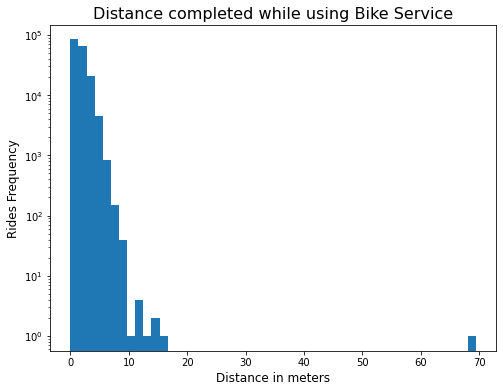

In [344]:
plt.figure(figsize=[8, 6])
clean_df.distance.hist(bins=50, log=True)
plt.grid(b=None)
x_y_t('Distance in meters', 'Rides Frequency','Distance completed while using Bike Service' )

from the plot above, the plot is skewed mor to the left, thus we observe that most riders used Ford GoBike for less than 10km journeys

##### can we also explore the amount of time the riders spent before completing their rides while making use of the services?

> we'll plot a time verus rides freqeuncy graph to accomplish this

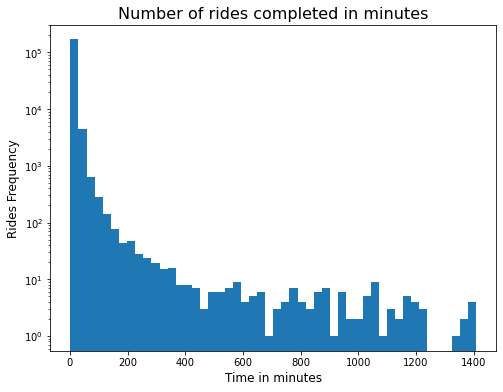

In [345]:
plt.figure(figsize=[8, 6])
clean_df.duration_minutes.hist(bins=50, log=True)
plt.grid(b=None)
x_y_t('Time in minutes', 'Rides Frequency','Number of rides completed in minutes' )

> from the Above plot, most rides were completed in the first 1  hour (20 - 40 minutes)!

#### Week Analysis

> next is can we check the days with the highest number bike services demand??

> we'll plot a Day of the week versus rides frequency plot to solve this

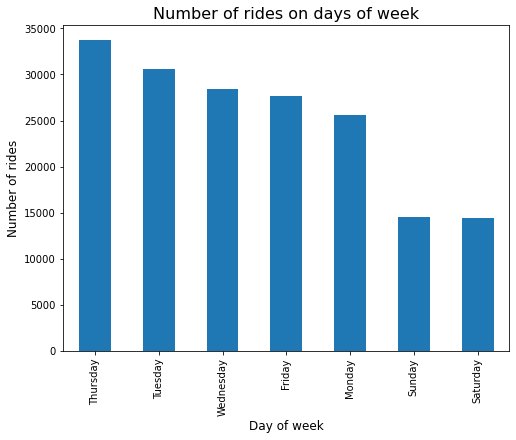

In [346]:
# plot a graph to see how many rides were taken on different weekdays
plt.figure(figsize=[8, 6])
clean_df.groupby('start_day').count().sort_values('duration_minutes', ascending=False).duration_minutes.plot(kind='bar')
x_y_t('Day of week', 'Number of rides','Number of rides on days of week' )

from the above plot, saturdays and sundays were the least days where the bike services wasn't in demand and its quite understanable cos its falls within the weekend, while Thursday and Tuesday possesing the highest demand 

###### Now we know the days with the highest demand, next thing is can  we check what time of the day demand had higher activities?

> next is to plot a time of the Day graph versus Rides Frequency chart to solve this

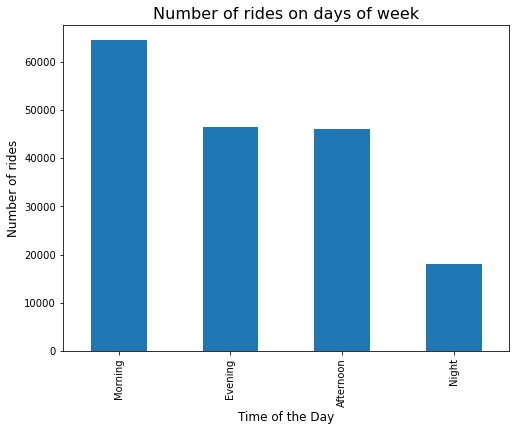

In [347]:
# plot a graph to see how many rides were taken on different weekdays
plt.figure(figsize=[8, 6])
clean_df.groupby('day_time').count().sort_values('duration_minutes', ascending=False).duration_minutes.plot(kind='bar')
x_y_t('Time of the Day', 'Number of rides','Number of rides on days of week' )

Morning times are have the highest traffic / Demand as people are trying to get somewhere, while the Afternoon and Evening times are almost evenly distributed signifying different close times from work during weekdays.

##### Riders Insight

> can we check the the proportion of customer versus active Subcribers ??  

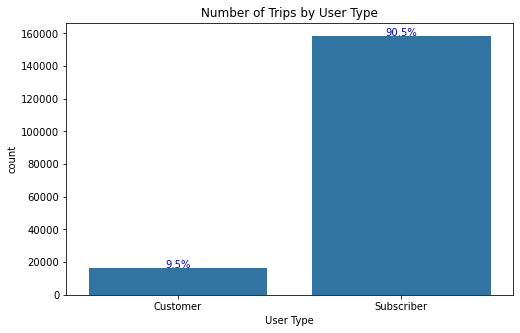

In [348]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = clean_df, x = 'user_type', color = base_color)
plt.title('Number of Trips by User Type')
plt.xlabel('User Type')

n_points = clean_df.shape[0]
user_counts = clean_df['user_type'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()

the above data clearly shows 90.5% o riders/ users were Subcribers with 9.5% for customers... most customers enjoy the services and are therefore subcribe to the GoBike Services!!

In [349]:
# binsize = 10
# bins = np.arange(0, clean_df['duration_minutes'].max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = clean_df, x = 'duration_minutes', bins = bins)
# plt.xlim(0, 100)
# plt.xlabel('Trip Duration (minutes)')
# plt.title('Distribution of Trip Duration');

###### Up next, we want to zero in to the gender distribution of both customers and subcribers

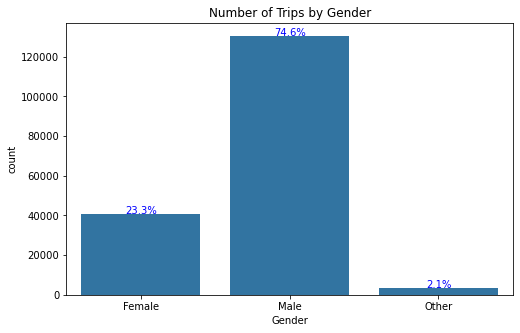

In [350]:
#bar plot of Gender
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = clean_df, x = 'member_gender', color = base_color)
plt.title('Number of Trips by Gender')
plt.xlabel('Gender')

n_points = clean_df.shape[0]
gender_counts = clean_df['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()

this plot shows users are more of the Male gender(74.6%) and 23.3% of Female while  LGBtQ+ / no identity people might be among the others 

> we want to also know the popular age group between our customers and subribers....

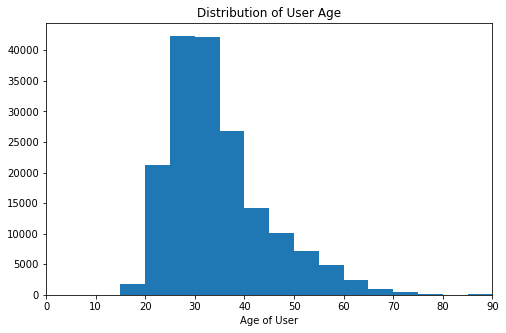

In [351]:
binsize = 5
bins = np.arange(0, clean_df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = clean_df, x = 'Age', bins = bins)
plt.xlim(0, 90)
plt.xlabel('Age of User')
plt.title('Distribution of User Age');

we can observe that most users are between their mid 20s to mid 30s

## Bivariate Exploration


###### Can we isolate the an age group and view their activities and how long they took to complete their trip??

In [352]:
def Ax_Ay_At(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)

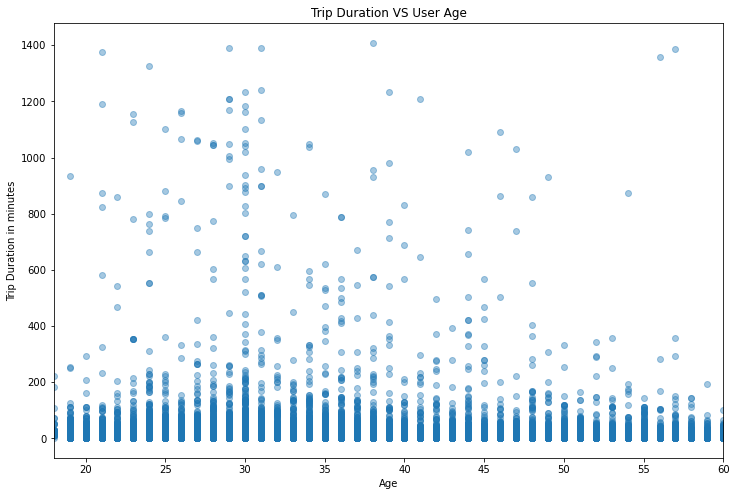

In [353]:
# scatter plot of duration vs. age
plt.figure(figsize = [12, 8])
plt.scatter(data = clean_df, x = 'Age', y = 'duration_minutes', alpha = 0.4)
plt.xlim(18, 60)
Ax_Ay_At('Age','Trip Duration in minutes','Trip Duration VS User Age')

> When we take the 18 - 60 years old age bracket, we can see that most trip duration lasted under 200 minutes, across the board with ligth occurences after 200 minutes 

###### can we see the density of the distance covered in relation to time??

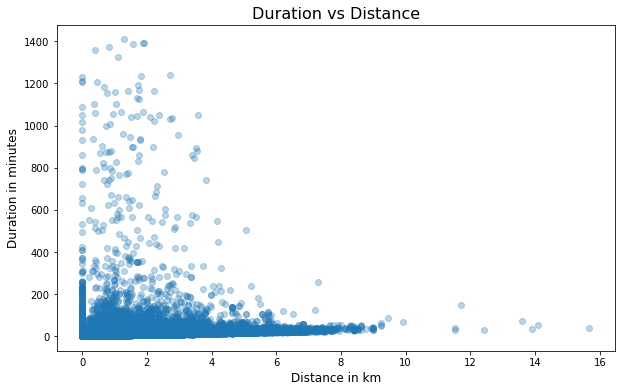

In [354]:
# due to the distance outliers the relation between distance and duration_minutes is not as clear.
# Lets drop the outliers and create a plot 
df_dis_dur = clean_df.query("distance < 20")
plt.figure(figsize=[10, 6])
plt.scatter(data = df_dis_dur, x = 'distance', y = 'duration_minutes', alpha = 0.3)
x_y_t('Distance in km', 'Duration in minutes', 'Duration vs Distance')

> from the above scatter plot we can observe that the most distances ranging from 2 to almost 10km were mostly completed in under 200 minutes  

###### can we zoom in into the active time of the day in each day of the week??

In [355]:
# lets set the day order we want:
day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

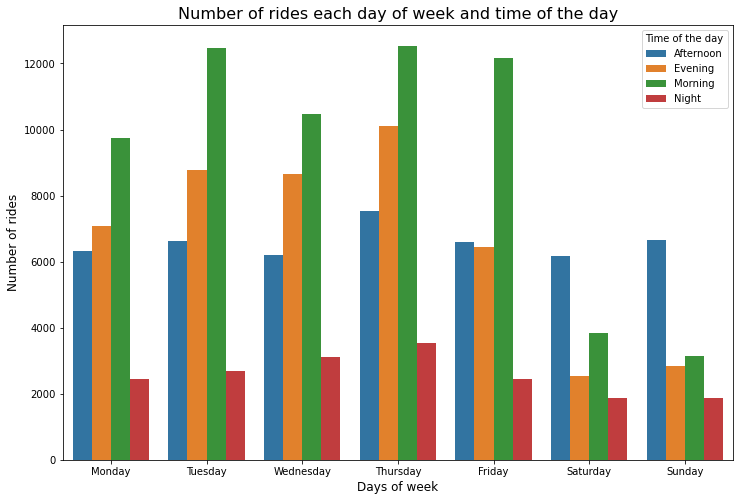

In [356]:
# plot a graph to see what time of the day rides are taken for each day of the week
plt.figure(figsize=[12, 8])
sb.countplot(data = clean_df, x = 'start_day', order= day, hue = 'day_time')
x_y_t('Days of week', 'Number of rides', 'Number of rides each day of week and time of the day')
plt.legend(title = 'Time of the day');

>here we can see a well detailed info for specific times of each days o the week for example, the busiest times are tuesday, thursday and friday mornings, followed by tuesday, wednesday and thursday evening for the evening time, 
whilst the afternoon times remained fairly equal throughout the whole week

###### can we also compare and contrast between customer and subcriber durin the days of the week??

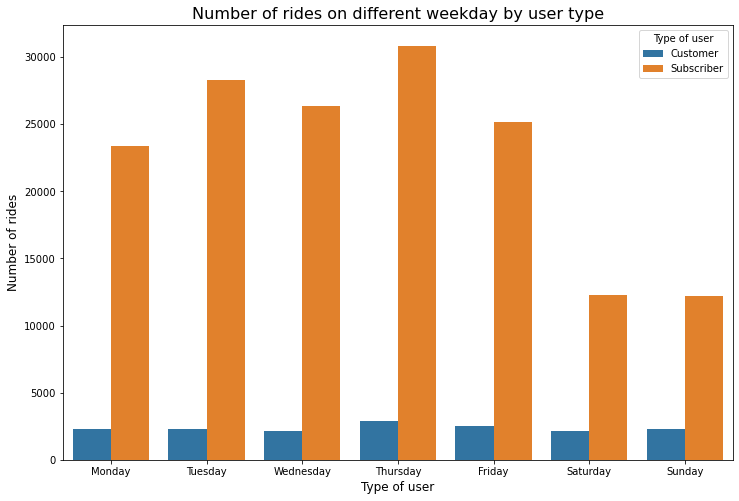

In [357]:
# plot a graph to see how different user types ride each day of week
plt.figure(figsize=[12, 8])
sb.countplot(data = clean_df, x = 'start_day',order= day, hue = 'user_type')
x_y_t('Type of user', 'Number of rides', 'Number of rides on different weekday by user type')
plt.legend(title = 'Type of user');

> from the plot above we can observe clearly that the subcribers are more active and more in numbers than the cutomer, and that the customers number / frequency remain fairly constant throughout the week, even during weekends when subcribers trips exeprience a sharp drop

###### Are there any correlation between these variables ?

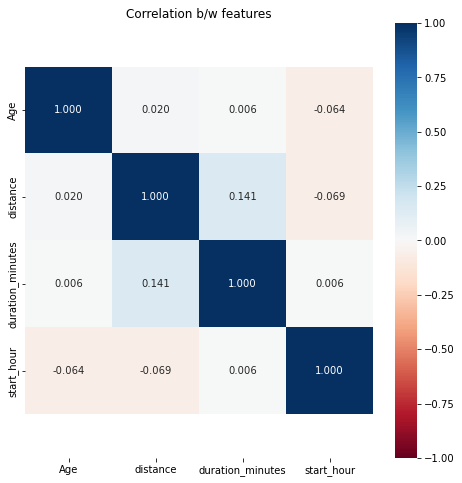

In [358]:
plt.figure(figsize=(8,8))
ax = sb.heatmap(clean_df.corr(), cmap = 'RdBu',  square=True, vmin=-1, vmax=1, annot=True, fmt = '.3f');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation b/w features');

from the above heat map, we can see the correlation relationship between varaibles, for example, the start hour has a low (-0.64) relationship to the age of the user, meaning age not really affected by time users start their trip, unlike age vs Duration which show a fairly low positive correlation, meaning younger people dont significantly tend to finish their rides faster than the older ones 

###### on an average, how long does the Subriber and Customer rides take?? 

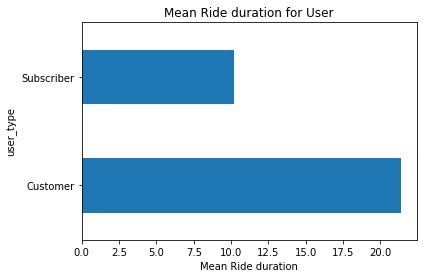

In [359]:
clean_df.groupby('user_type').duration_minutes.mean().plot(kind='barh');
plt.title('Mean Ride duration for User');
plt.xlabel('Mean Ride duration');

for some reason the Customer rides takes more trip times when compared to the  trip times of the subcriber which is less than half of the customer"s time on an average

###### Can we zoom into the the hourly activities of both subribers and customers? 

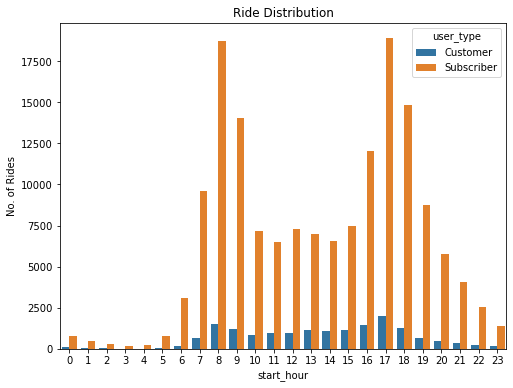

In [360]:
plt.figure(figsize=(8,6))
sb.countplot(data = clean_df, x = 'start_hour', hue='user_type');
plt.ylabel('No. of Rides');
plt.title('Ride Distribution');

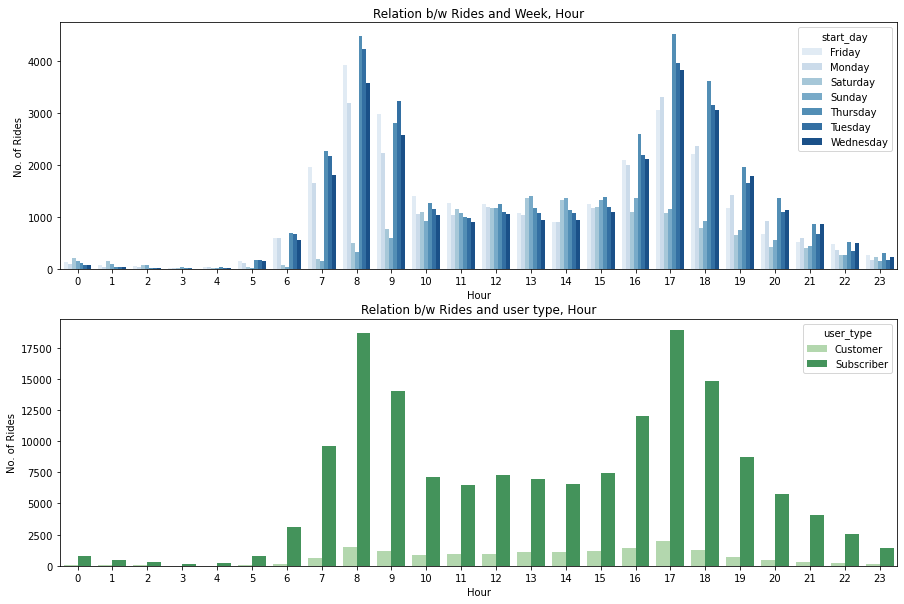

In [361]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sb.countplot(data = clean_df, x='start_hour', hue= 'start_day', palette = 'Blues');

Ax_Ay_At('Hour', 'No. of Rides', 'Relation b/w Rides and Week, Hour')

plt.subplot(2, 1, 2)
sb.countplot(data = clean_df, x='start_hour', hue='user_type', palette = 'Greens');
Ax_Ay_At('Hour', 'No. of Rides', 'Relation b/w Rides and user type, Hour')

> from the 3 plots above, we can see that activities of both customers and subcribers have same type of pattern, even though there's a huge gap between them whenit comes to numbers, but their activities similar, starting by 6 am, peaking by 8am ,then dropping 9am, and fairly constant till close houurs of 4(16hr), 5(17hr) and 6pm(18hr) when people start to return.

###### can we use a violin plots to substantiate Trip times between users??

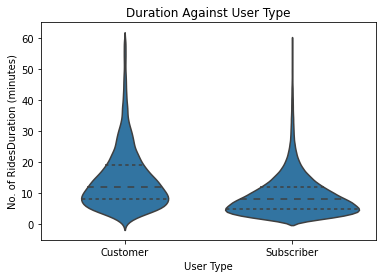

In [362]:
#will take a subset of the data where duaration was less than an hour.
clean_df = clean_df.query("duration_minutes < 60")
base_color = sb.color_palette()[0]
sb.violinplot(data=clean_df, x='user_type', y='duration_minutes', color=base_color, inner='quartile')
Ax_Ay_At('User Type', 'No. of Rides''Duration (minutes)', 'Duration Against User Type')

> from the violin plots, we see that the more subcribers are more likely to finish 10 minutes and really reduces before we get to 20 minutes, while Customers have a significant number of persons finishing well over 20 minutes, whci conirms our previous plots

In [363]:
# clean_df.groupby('user_type')['duration_minutes'].describe()

###### can we use a violin plots to substantiate our previous plot between gender??

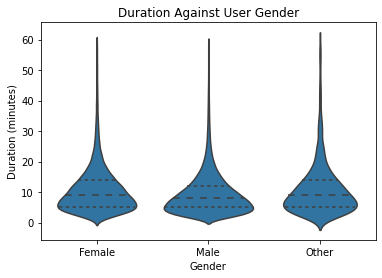

In [364]:
base_color = sb.color_palette()[0]
sb.violinplot(data= clean_df, x='member_gender', y='duration_minutes', color=base_color, inner='quartile')
Ax_Ay_At('Gender', 'Duration (minutes)', 'Duration Against User Gender')

> From the above plot, Gender differnce isnt a real factor that affect trip times......

###### lets check out the popular age range between users type...... 

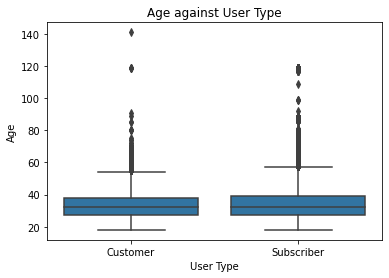

In [365]:
sb.boxplot(data=clean_df, x='user_type',y='Age',color=base_color)
Ax_Ay_At('User Type', 'Age', 'Age against User Type')

In [366]:
clean_df.groupby('user_type')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,15864.0,33.644793,9.461973,18.0,27.0,32.0,38.0,141.0
Subscriber,157702.0,34.246617,10.178865,18.0,27.0,32.0,39.0,119.0


> from the above we can observe that both customers ans subcribers have fairly similar age range in Go_bike usage both show popularity amongst mid 30s Users

##### Can we see the behavioural pattern for each Age???

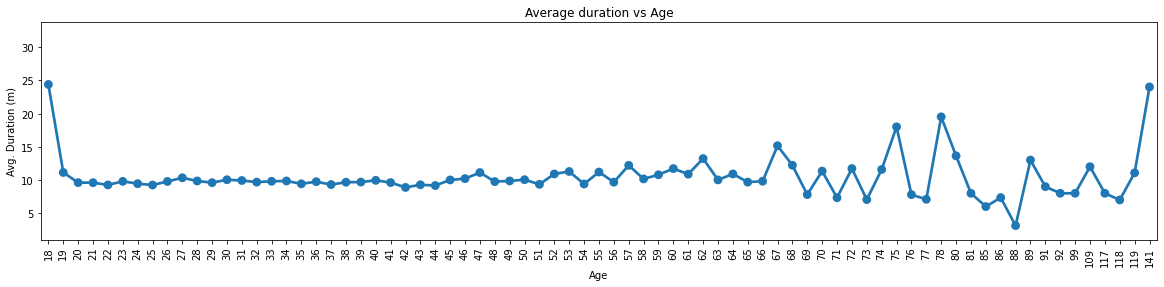

In [367]:
# let plot another type of plot (Point plot) for this:
plt.figure(figsize=[20, 4])

sb.pointplot(data=clean_df, x='Age', y='duration_minutes', errwidth=0)
plt.xticks(rotation=90)
Ax_Ay_At('Age', 'Avg. Duration (m)', 'Average duration vs Age')

> From the plot above We can also observe again the usage of the 18 yr olds in terms of trip minutes Duration on an average, while the time is quiet stable from 20 year olds to the 46 yrs old, from there it fluters between ages, due to the occurence of few users in those age range, so the data might not reall be able to give an insight into the behavioural pattern of those age group and this is shown below in the age count code

In [368]:
# clean_df.Age.describe()
clean_df.Age.value_counts().tail(20)

119    53
71     51
76     30
18     29
77     21
86     20
73     19
80     11
117    11
78      8
118     6
99      3
81      3
75      2
85      2
91      1
141     1
89      1
109     1
92      1
Name: Age, dtype: int64

In [369]:
# # relationship between member_gender and user type
# sb.countplot(data=clean_df, x='member_gender', hue='user_type')
# plt.xlabel('Gender')
# plt.legend(title='User Type')
# plt.title('User type');

In [370]:
# sb.heatmap(clean_df[['distance', 'duration_minutes']].corr(), annot = True, fmt = '.3f',
#            cmap = 'vlag_r', center = 0)
# plt.title('Duration vs Distance');

### Some of the relationships observed in this part of the investigation. Including feature(s) of interest vary with other features in the dataset.

> when we observe the mean duration plot between customers and subcribers, we notice that Customer uses the bike for more duration on average than Subscribers.

> when we take into account the 'Number of rides each day of week and time of the day' plot we can see that the most active days are tuesdays wednesdays and thursdays with the Morning time having most activities, something interesting is the afternoon rides whic are fairly consistent throughout the week including weekends (saturdays and sunday) all ranging bettween over 6k to less than 8k rides, while there are always less night rides meaning riders are less likel to want a ride after 7pm in the evening.

> 7AM - 9AM && 4PM - 6PM are peak times, in between that (10AM - 3PM) have a almost horizontal line in demand. while other times quite as you get further away frm these active times.

> in the Duration Against User Type violin plot, there's just a little diference between both gender in times of duration of time used to complete rides. so Gender did not really affect the length of the trip duration.

>In addition, we could see that a user who subscribes to the GoBike service on average takes shorter journeys than one-off customers. However as the subscriber user is more regular then the customer user is more likely to be affected by random trips.

## Multivariate Exploration

#### can we check the usage pattern across age group in both Gender??

In [371]:
#Split into groups as this may make it easier
age_bins = [0, 19, 29, 39, 49, 59,
            69, 79, 89, 99]
age_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59',
              '60 - 69', '70 - 79', '80 - 89', '90 - 99']

clean_df['age_group'] = pd.cut(clean_df['Age'], bins = age_bins, labels = age_labels, right = False)

In [372]:
#taking a subset
clean_df_Age = clean_df[clean_df['Age']<=60]

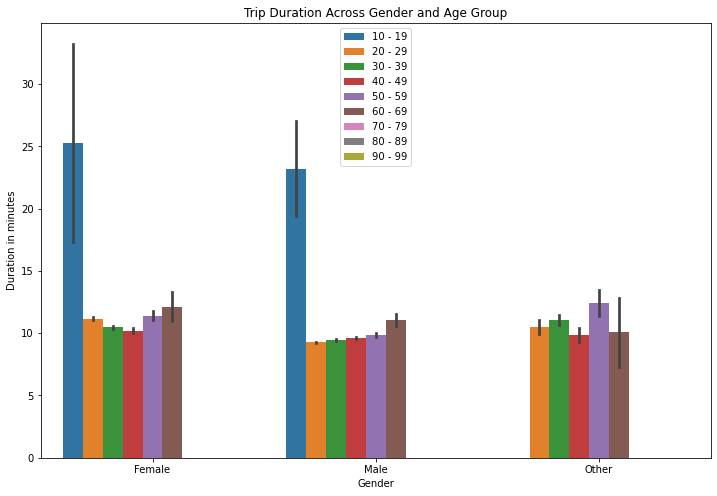

In [373]:
plt.figure(figsize = [12, 8])
ax = sb.barplot(x='member_gender', y = 'duration_minutes', hue='age_group', data=clean_df_Age.sort_values(by= 'age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration in minutes')
leg = ax.legend()

> from our previous plot, we was the efect of the 18 year olds in Trip duration, and in the plot above we can see that same occurence, with the female gender slightly more over the 25 minute mark and the male gender just under the 25 minute mark, further more, when could also see that older women tend to take significantly more time in completiing their trip when compaired to their male counterparts 

##### Can we also see the Age compairison between Users???

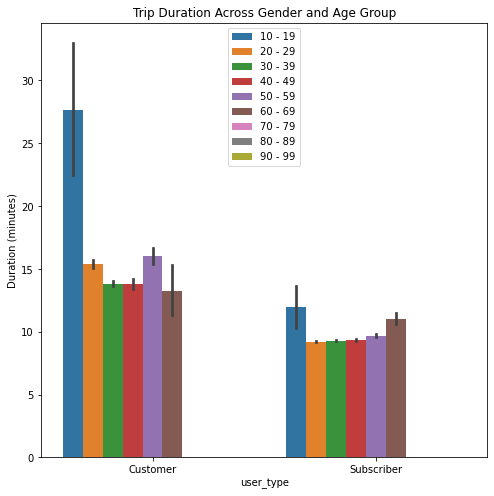

In [374]:
plt.figure(figsize = [8, 8])
ax = sb.barplot(x='user_type', y = 'duration_minutes', hue='age_group', data=clean_df_Age.sort_values(by= 'age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('user_type')
plt.ylabel('Duration (minutes)')
leg = ax.legend()

> From the plot abve we can observe that its the 18 - 19 yr old Customers that are responsible for the higer drip duration in that age group, while customers tend to use more time completing their rides on the average than the normal Subcriber

In [375]:
# clean_df.head(1)

In [376]:
# # create a data set for different user type with total distance travelled throughout the month of february
# df_distance  = clean_df.groupby(['user_type', 'start_day'])
# dis_sum = df_distance.distance.sum()
# user_type = df_distance[['user_type']].first()
# month = df_distance[['start_day']].first()
# df_distance = pd.concat([dis_sum, user_type, month], 1)

In [377]:
# df_distance

In [378]:
# # create a data set for different user type with total duration in minutes on each weekday
# df_duration  = clean_df.groupby(['start_day', 'user_type'])
# dur_sum = df_duration.duration_minutes.sum()
# user_type = df_duration[['user_type']].first()
# day = df_duration[['start_day']].first()
# df_duration = pd.concat([dur_sum, user_type, day], 1)
# df_duration

##### Can we also check the activity / behaviour of the Subcribers versus the customer??

In [379]:
day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def x_y_t(xL,yL,title):
    plt.title(title, fontsize=16)
    plt.xlabel(xL, fontsize=12)
    plt.ylabel(yL, fontsize=12)

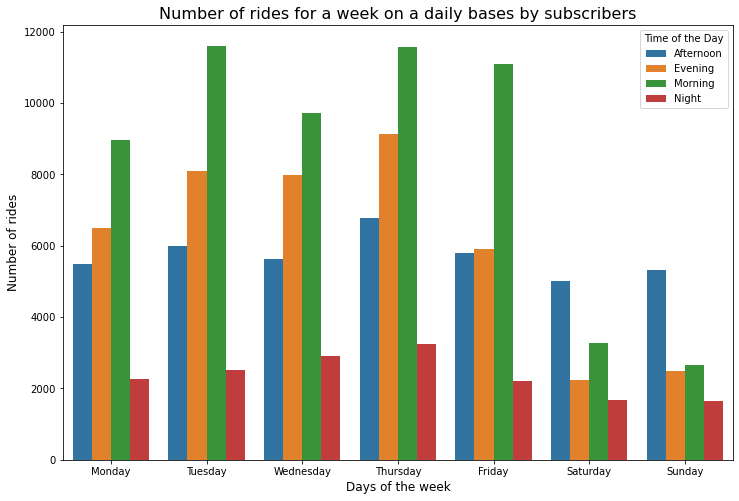

In [380]:
# plot a graph to see how different user types ride each Day of the week
plt.figure(figsize=[12, 8])
sb.countplot(data = clean_df.query('user_type == "Subscriber"'), x = 'start_day', order= day, hue = 'day_time')
x_y_t('Days of the week', 'Number of rides', 'Number of rides for a week on a daily bases by subscribers')
plt.legend(title = 'Time of the Day');

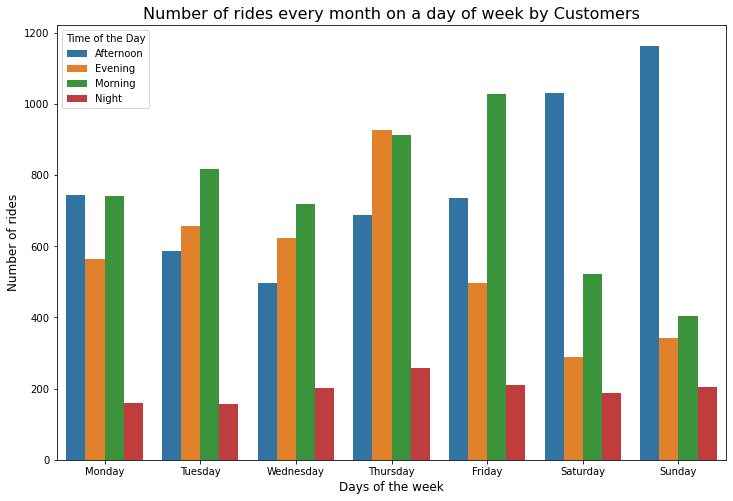

In [381]:
# plot a graph to see how different user types ride each day of the week
plt.figure(figsize=[12, 8])
sb.countplot(data = clean_df.query('user_type == "Customer"'), x = 'start_day', order= day, hue = 'day_time')
x_y_t('Days of the week', 'Number of rides', 'Number of rides every month on a day of week by Customers')
plt.legend(title = 'Time of the Day');

> While Tuesday, Thursday, Friday mornings are the most active times for subcribers, customers are more active Friday mornings, saturday and sunday Afternoons, whereas weekday and weekend afternoons are fairly constant between Subcribers 

In [382]:
clean_df.to_csv('for_exlporation_analysis.csv', index=False)

#### Some of the relationships observed in the Multivariate Exploration:

> when we group Gender by Ages, Across both male and female within member_gender, users between the age of 10 and 19 took trips that lasted longer than the other ages groups. dues to youthful vigour, exuberance, fitness level etc. also this same age group (10 to 19 year old) who were one off customers took the longest trips. This could be due to the individual using it for recreational purposes or going to school as examples

> The further analysis strengthened the initial observation of short duration rides and shorter distances. Also subscribers using the bike more than customers. The weekdays account for most of the rides. 

> The customer has the highest duration and the male customer has the highest proportion and the customer has the highest duration and the other gender is riding more in the basis of start day of week

> Something interesting is The spike in demand for bikes by Customers during saturday and Sunday Afternoon alongside friday mornings and its high drop in subcribers during same time in weekends . Also it looks like Tuesdays, thursdays and Fridays mornings have the highest demands in general.

> Also older age groups (50 - 69) took  more time to complete their rides across genders. You could assume that those in retirement have more time to spare to take longer trips.

### Conclusions:
After the analysis we can make following observations:  

- Most of the users are subscribers.

- Ridership is almost constant on weekdays (Mon-Fri) then decreses on weekends.

- Highest bike demands on 8:00 and 17:00 on weekdays, suggests that users might office commuters.

- Customer uses the bike for more duration on average than Subscribers.

- The no. of rides by customer increases as the no. of rides by subscribers decreases. At 14:00 the subscribers ridership is min (local) while the customer ridership is at maximum.

- On weekdays ridership increased at 8:00, and 17:00 while on weekends the ridership increases between 11:00 to 15:00

- Also distance and the duration have a very small correlation, customers ride longer than the subscribers. Saturday and sundays are the days with longer ride duration and the female customers average ride duration is the highest.